### The Task
The "Bank Marketing Data Set" from the UCI Machine Learning Repository is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict if the client will subscribe a term deposit (variable y). You can find a description of the attributes at the original UCI URL, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

The UCI page contains multiple versions of the data, so the version that you need to work with is here:

Bank Marketing Data
In this assignment you have to build three classifiers for this data set: a decision tree, a naïve Bayes classifier, and a random forest. Use a suitable evaluation metric to compare the performance of the three classifiers.

In [36]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB ? eta -:--:--
   ---------------------------------------- 81.9/81.9 kB 572.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [286]:
import pandas as pd

In [221]:
bank_data = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [222]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Data Summary

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Downloading the data as Excel into pc

In [60]:
file_path = r'C:\Users\skund\OneDrive\Desktop\data.xlsx'

# Save the DataFrame as an Excel file
bank_data.to_excel(file_path, index=False)

print("Data saved as Excel file successfully.")

Data saved as Excel file successfully.


In [129]:
# for col in bank_data.columns:
#     print(bank_data[col].value_counts())   

### Description of Target variable

In [11]:
bank_data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

### Checking for Missing Values

In [130]:
# check missing values in variables
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Data Preprocessing (Categorical Encoding)

In [223]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=list(bank_data.columns[1:8])+[bank_data.columns[14]])
bank_data = encoder.fit_transform(bank_data)


months = ['','jan', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec']
day=['','mon','tue','wed','thu','fri','sat','sun']
y=['no','yes']


for r in range(len(bank_data)):
    for m in range(len(months)):
        if bank_data.iloc[r,8]==months[m]:
            bank_data.iloc[r,8]=m
    for d in range(len(day)):
        if bank_data.iloc[r,9]==day[d]:
            bank_data.iloc[r,9]=d
    # for resp in range(len(y)):
    #     if bank_data.iloc[r,20]==y[resp]:
    #         bank_data.iloc[r,20]=resp


In [184]:
# Encoded Data
bank_data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,2,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,1,2,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,1,1,2,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,1,2,1,2,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,1,1,2,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,1,2,1,2,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,5,1,5,1,1,1,2,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [224]:
from sklearn.tree import DecisionTreeClassifier, export_text
X = bank_data.iloc[:, :-1]
y = bank_data.iloc[:,-1]

In [186]:
# X

In [187]:
# y

### Feature Reduction (PCA)

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[0:])

In [189]:
dfx

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-1.496969,-0.732858,-1.499673,-0.513600,-1.056746,-0.438089,-1.31827,-0.787808,-1.402469,0.010471,-0.565922,0.195414,-0.349494,-0.372802,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-1.089485,-0.732858,-1.042111,1.945327,-1.056746,-0.438089,-1.31827,-0.787808,-1.402469,-0.421501,-0.565922,0.195414,-0.349494,-0.372802,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-1.089485,-0.732858,-1.042111,-0.513600,0.790990,-0.438089,-1.31827,-0.787808,-1.402469,-0.124520,-0.565922,0.195414,-0.349494,-0.372802,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.682002,-0.732858,-0.584550,-0.513600,-1.056746,-0.438089,-1.31827,-0.787808,-1.402469,-0.413787,-0.565922,0.195414,-0.349494,-0.372802,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,-1.089485,-0.732858,-1.042111,-0.513600,-1.056746,1.754912,-1.31827,-0.787808,-1.402469,0.187888,-0.565922,0.195414,-0.349494,-0.372802,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.540449,-0.732858,0.330573,-0.513600,0.790990,-0.438089,0.75857,2.151966,1.431401,0.292025,-0.565922,0.195414,-0.349494,-0.372802,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,-0.274518,-0.732858,0.330573,-0.513600,-1.056746,-0.438089,0.75857,2.151966,1.431401,0.481012,-0.565922,0.195414,-0.349494,-0.372802,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,0.540449,-0.732858,1.245696,-0.513600,0.790990,-0.438089,0.75857,2.151966,1.431401,-0.267225,-0.204909,0.195414,-0.349494,-0.372802,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.132965,-0.732858,0.330573,-0.513600,-1.056746,-0.438089,0.75857,2.151966,1.431401,0.708569,-0.565922,0.195414,-0.349494,-0.372802,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

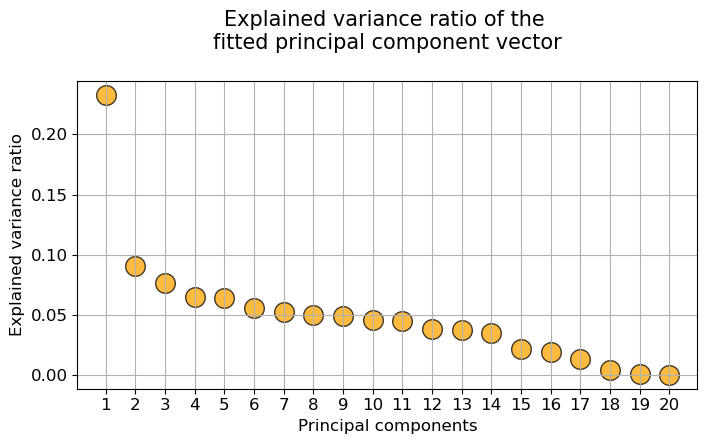

In [191]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=15)
plt.xlabel("Principal components",fontsize=12)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Explained variance ratio",fontsize=12)
plt.show()

### Splitting the dataset into training and testing set

In [288]:
# Feature Vector and Target Variable
X = bank_data.iloc[:, :-1]
y = bank_data.iloc[:,-1]

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [290]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [296]:
def evaluate_model(c):
    # Fitting the model
    c.fit(X_train, y_train)
    print("Accuracy Score:",c.score(X_test,y_test))
    
    # Confusion Matrix implemetation
    y_pred=c.predict(X_test)
    conf_matrix= confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix")
    print(conf_matrix)
    
    # Classification Report
    classify = classification_report(y_test, y_pred)
    print("\nClassification Report")
    print(classify)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    ### Plot ROC Curve
    
    # Predict probabilities on the test set
    y_probabilities = c.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities, pos_label='yes')
    auc = roc_auc_score(y_test, y_probabilities)

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(False)
    plt.show()

DECISION TREE CLASSIFIER
Accuracy Score: 0.8893852578420899

Confusion Matrix
[[8555  589]
 [ 550  603]]

Classification Report
              precision    recall  f1-score   support

          no       0.94      0.94      0.94      9144
         yes       0.51      0.52      0.51      1153

    accuracy                           0.89     10297
   macro avg       0.72      0.73      0.73     10297
weighted avg       0.89      0.89      0.89     10297



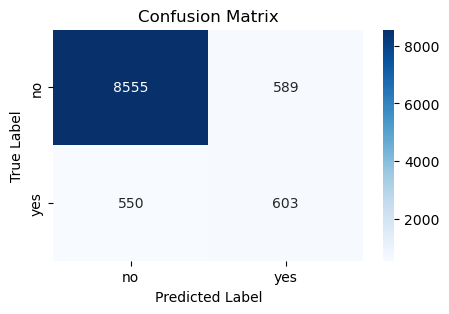

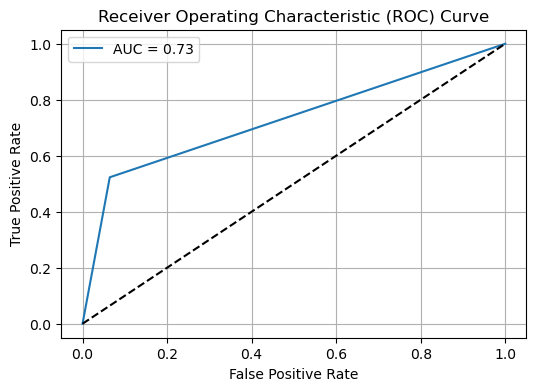

In [297]:
print("DECISION TREE CLASSIFIER")
evaluate_model(DecisionTreeClassifier(random_state=42))

RANDOM FOREST CLASSIFIER
Accuracy Score: 0.915897834320676

Confusion Matrix
[[8820  324]
 [ 542  611]]

Classification Report
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      9144
         yes       0.65      0.53      0.59      1153

    accuracy                           0.92     10297
   macro avg       0.80      0.75      0.77     10297
weighted avg       0.91      0.92      0.91     10297



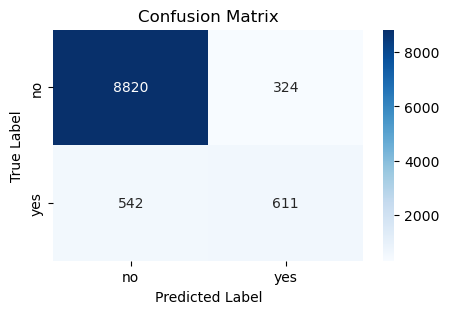

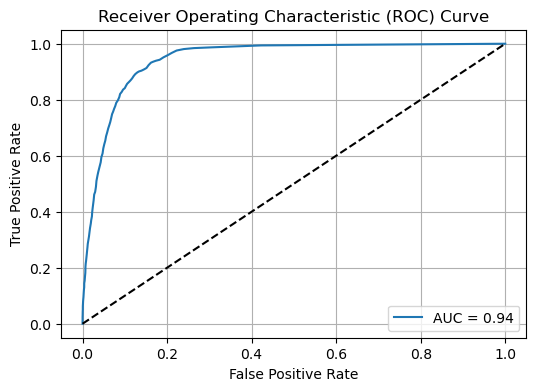

In [298]:
print("RANDOM FOREST CLASSIFIER")
evaluate_model(RandomForestClassifier(random_state=42))

NAIVE BAYES' CLASSIFIER
Accuracy Score: 0.849082256968049

Confusion Matrix
[[8068 1076]
 [ 478  675]]

Classification Report
              precision    recall  f1-score   support

          no       0.94      0.88      0.91      9144
         yes       0.39      0.59      0.46      1153

    accuracy                           0.85     10297
   macro avg       0.66      0.73      0.69     10297
weighted avg       0.88      0.85      0.86     10297



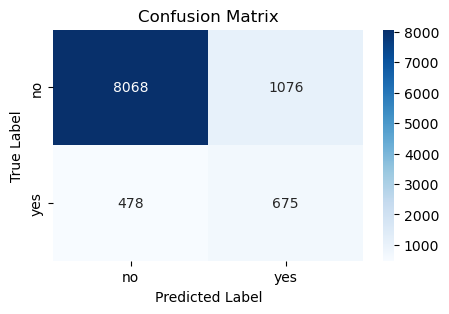

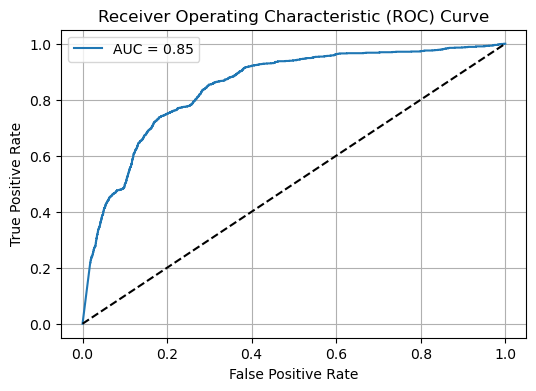

In [299]:
print("NAIVE BAYES' CLASSIFIER")
evaluate_model(GaussianNB())